In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#This dataset can be generated using Base_Gerada_KMeans notebook
data = np.loadtxt('dataset_kmeans.csv', delimiter=';', skiprows=1)

In [3]:
X = data[:, :2]
ytrue = data[:, 2]

In [4]:
class KMeans:
    """Implementation of KMeans using numpy"""
    
    def __init__(self, n_clusters, max_iter):
        self.n_clusters_ = n_clusters
        self.max_iter_ = max_iter
        self.cluster_centers_ = None
        self.labels_ = None
        self.inertia_ = None
        
    def euclidean_dist(self, p1, p2):
        """Calculates Euclidean distance between p1 and p2
        
           p1 is a array of coordinates
        """
        
        return np.sqrt(np.sum(np.power(p1 - p2, 2), axis=1))
    
    def update_clusters(self, k_centers, labels):
        n = len(k_centers)
        clusters_aux = np.zeros((n, 2))
        
        for k in range(n):
            clusters_aux[k] = np.mean(X[np.where(labels == k), :], axis=1)
                
        if np.all(clusters_aux == k_centers):
            return None
        else:
            return np.copy(clusters_aux)
            
    def fit(self, data):
        """Fits a KMeans model using data"""
              
        m = len(data)
        n = self.n_clusters_
        
        #Select n inicial positions for clusters
        self.cluster_centers_ = data[np.random.randint(m, size=n), :]
        
        matrix_dist = np.zeros((m, n))
        
        
        for i in range(self.max_iter_):
            #Classify data
            for k in range(n):
                matrix_dist[:, k] = self.euclidean_dist(X, self.cluster_centers_[k])

            self.labels_ = np.argmin(matrix_dist, axis=1)
            
            #Update clusters positions
            if self.update_clusters(self.cluster_centers_, self.labels_) is None:
                break
            else:
                self.cluster_centers_ = self.update_clusters(self.cluster_centers_, self.labels_)
                
        #Calculate Inertia - sum of squares distances of samples to their closest cluster centers
            
        self.inertia_ = np.mean(self.euclidean_dist(data, self.cluster_centers_[self.labels_]))   
            
        return 
    
    def predict(self, point):
        """Predicts in which cluster the point is located"""
       
        return  np.argmin(euclidean_dist(self.cluster_centers_, point))
    
    

In [5]:
teste = KMeans(3, 1000)

In [6]:
teste.fit(X)

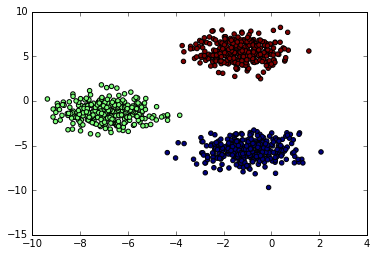

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=teste.labels_)

In [8]:
teste.inertia_

1.2472427088420008

In [9]:
class KMedians(KMeans):
    
    def update_clusters(self, k_centers, labels):
        n = len(k_centers)
        clusters_aux = np.zeros((n, 2))
        
        for k in range(n):
            clusters_aux[k] = np.median(X[np.where(labels == k), :], axis=1)
                
        if np.all(clusters_aux == k_centers):
            return None
        else:
            return np.copy(clusters_aux)

In [17]:
teste2 = KMedians(3, 1000)

In [18]:
teste2.fit(X)

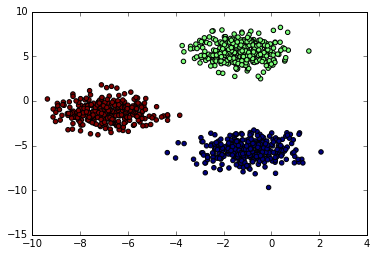

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=teste2.labels_)

plt.scatter(X[:, 0], X[:, 1], c=teste2.labels_)

In [13]:
class KMedoids(KMeans):
     def update_clusters(self, k_centers, labels):
        n = len(k_centers)
        clusters_aux = np.zeros((n, 2))
        
        #Big initial cost
        cost = 1000000 
        calc = 0
        cluster_arg = 0
        
        for k in range(n):
            points_cluster_k = np.where(labels == k)[0]
            for point in points_cluster_k:
                calc = np.mean(self.euclidean_dist(X[points_cluster_k], X[point]))
                if calc < cost:
                    cost = calc
                    cluster_arg = point
            clusters_aux[k] = X[point]
                
        if np.all(clusters_aux == k_centers):
            return None
        else:
            return np.copy(clusters_aux)

In [24]:
teste3 = KMedoids(3, 1000)

In [25]:
teste3.fit(X)

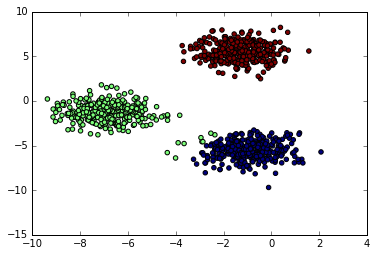

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=teste3.labels_)